<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.791228  99.076661  41.836460  ...  197.638926  197.800222 -0.161296
      1.0    50.865957  29.156174  85.806466  ...  176.398702  175.715437  0.683265
      2.0    53.241453  79.271011  58.287223  ...  200.812085  200.834005 -0.021921
      3.0    44.023871  29.059533  83.136568  ...  165.443415  166.104022 -0.660608
      4.0    84.337116  32.041489  65.096780  ...  191.796633  191.456514  0.340120
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  29.398461  57.082024  32.339558  ...  128.779113  128.790072 -0.010959
      116.0  48.696410  63.064864  38.042694  ...  159.532445  159.804687 -0.272242
      117.0  49.277983  88.902592  67.228881  ...  216.090351  215.375183  0.715168
      118.0  28.408715  73.675396  95.544492  ...  207.946122  207.586590  0.359531
      119.0  63.878747  21.259397  29.022068  ...  124.059680  124.261804 -0.202124

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.791228  99.076661  41.836460  ...  197.638926  197.800222 -0.161296
      1.0    50.865957  29.156174  85.806466  ...  176.398702  175.715437  0.683265
      2.0    53.241453  79.271011  58.287223  ...  200.812085  200.834005 -0.021921
      3.0    44.023871  29.059533  83.136568  ...  165.443415  166.104022 -0.660608
      4.0    84.337116  32.041489  65.096780  ...  191.796633  191.456514  0.340120
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  29.398461  57.082024  32.339558  ...  128.779113  128.790072 -0.010959
      116.0  48.696410  63.064864  38.042694  ...  159.532445  159.804687 -0.272242
      117.0  49.277983  88.902592  67.228881  ...  216.090351  215.375183  0.715168
      118.0  28.408715  73.675396  95.544492  ...  207.946122  207.586590  0.359531
      119.0  63.878747  21.259397  29.022068  ...  124.059680  124.261804 -0.202124

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.791228  99.076661  41.836460  ...  197.638926  197.800222 -0.161296
      1.0    50.865957  29.156174  85.806466  ...  176.398702  175.715437  0.683265
      2.0    53.241453  79.271011  58.287223  ...  200.812085  200.834005 -0.021921
      3.0    44.023871  29.059533  83.136568  ...  165.443415  166.104022 -0.660608
      4.0    84.337116  32.041489  65.096780  ...  191.796633  191.456514  0.340120
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  29.398461  57.082024  32.339558  ...  128.779113  128.790072 -0.010959
      116.0  48.696410  63.064864  38.042694  ...  159.532445  159.804687 -0.272242
      117.0  49.277983  88.902592  67.228881  ...  216.090351  215.375183  0.715168
      118.0  28.408715  73.675396  95.544492  ...  207.946122  207.586590  0.359531
      119.0  63.878747  21.259397  29.022068  ...  124.059680  124.261804 -0.202124

[120000 rows x 7 columns]

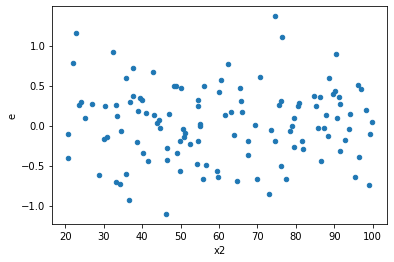

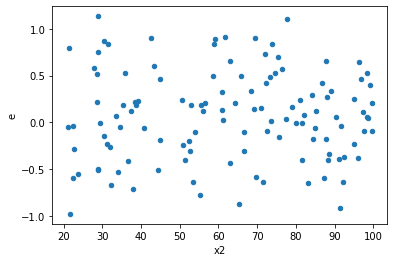

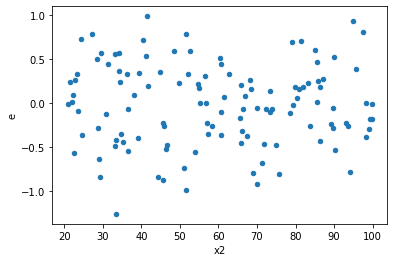

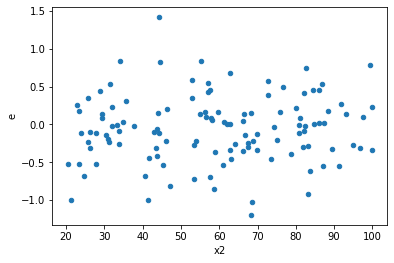

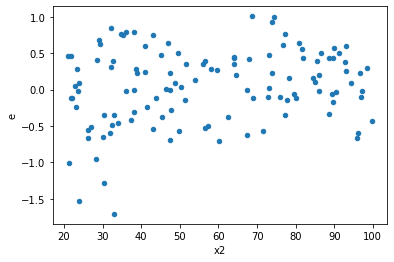

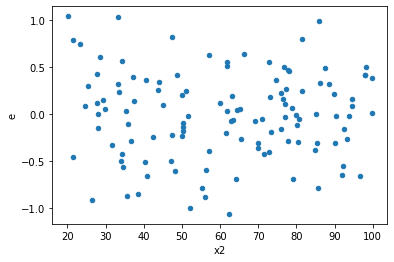

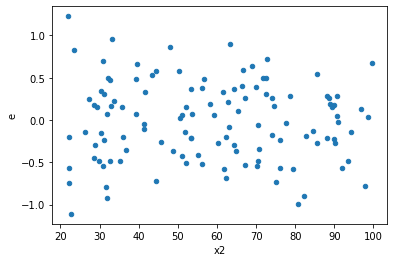

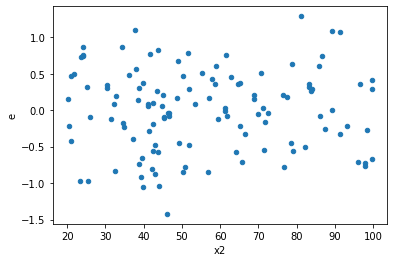

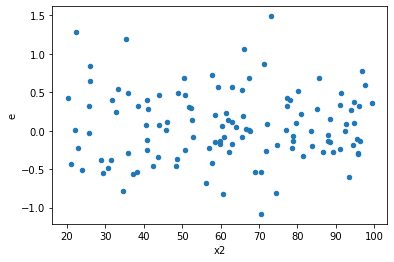

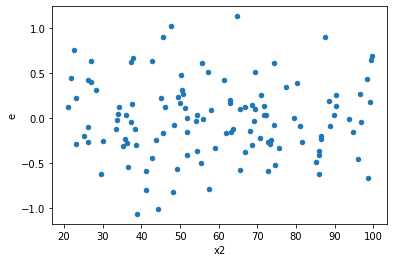

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,45.0,45.0,8.492291825728618,8.762626579670346,0.18871759612730263,0.19472503510378547,1.0318329562253985,0.9167547911618121,0.5416226044190939,0.45837739558090607,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,7.124037797836499,8.190832977014509,0.1583119510630333,0.18201851060032243,1.149745861750198,0.6417494385561979,0.679125280721901,0.32087471927809896,Reject005=1 : Homoscedasticity
28.0,45.0,45.0,8.784421208395269,9.565082461638216,0.19520936018656154,0.2125573880364048,1.0888688320747721,0.7764551258172949,0.6117724370913525,0.38822756290864746,Reject005=1 : Homoscedasticity
32.0,45.0,45.0,8.881075800709407,9.607866903181147,0.1973572400157646,0.21350815340402549,1.0818359305540084,0.7930616945196904,0.6034691527401548,0.3965308472598452,Reject005=1 : Homoscedasticity
40.0,45.0,45.0,7.351922898671137,8.490372505361089,0.16337606441491415,0.18867494456357975,1.15485059111484,0.6312186549194374,0.6843906725402813,0.3156093274597187,Reject005=1 : Homoscedasticity
45.0,45.0,45.0,8.134906551579526,10.297098909612124,0.1807757011462117,0.22882442021360277,1.265791910985477,0.43229321114927344,0.7838533944253633,0.21614660557463672,Reject005=1 : Homoscedasticity
50.0,45.0,45.0,7.876215008286508,8.346087173791053,0.1750270001841446,0.1854686038620234,1.0596571024293011,0.8467517773818289,0.5766241113090855,0.42337588869091447,Reject005=1 : Homoscedasticity
54.0,45.0,45.0,7.0226531651997615,7.443179932114544,0.15605895922666135,0.16540399849143433,1.0598814660246463,0.8461989194734207,0.5769005402632896,0.42309945973671037,Reject005=1 : Homoscedasticity
55.0,45.0,45.0,8.105542966793037,8.305626413126635,0.18012317703984526,0.18456947584725855,1.0246847678376765,0.9351749387300334,0.5324125306349833,0.4675874693650167,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,8.662917592521012,8.106928931413442,0.19250927983380026,0.18015397625363205,0.9358196987135635,0.8249109092845379,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,14.014064668401709,7.866873041830387,0.31142365929781574,0.17481940092956416,0.5613555544358422,0.05576411572580779,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,8.492291825728618,8.762626579670346,0.18871759612730263,0.19472503510378547,1.0318329562253985,0.9167547911618121,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,9.767406839324694,5.5778799269203745,0.21705348531832655,0.12395288726489721,0.5710707067574162,0.06334545087742972,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,11.46053793788143,9.70927371545773,0.25467862084180953,0.21576163812128288,0.8471917957153559,0.5803943655360712,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,7.124037797836499,8.190832977014509,0.1583119510630333,0.18201851060032243,1.149745861750198,0.6417494385561979,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,12.237211792665619,8.019002685545406,0.27193803983701376,0.1782000596787868,0.6552965513232026,0.1601253158227101,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,11.732997945232503,8.131919218754648,0.2607332876718334,0.1807093159723255,0.6930811082310732,0.2226733078624584,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,12.857964571319137,7.195239832784324,0.28573254602931414,0.15989421850631833,0.5595940005025339,0.05446168845395413,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      787
Reject005=0 : Heteroscedasticity    213
Name: Result_test, dtype: int64